In [1]:
# Relevant Package Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [70]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')

In [71]:
len(db[db['Year_Birth'].isna()])

195

In [72]:
len(db[db['Year_Birth']>2006])

813

In [73]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db[db.duplicated(keep = False)]
db.drop_duplicates(inplace = True)
# Changing NA values to median value of year and converting to int32
db['Year_Birth'] = db['Year_Birth'].fillna(db['Year_Birth'].median()).astype(int).astype(np.int16)
db['RewardPoints'] = db['RewardPoints'].fillna(db['RewardPoints'].median()).astype(np.int16)
# Converting every column that is int64 to int8 for performance issues
db.iloc[:,(db.dtypes=='int64').values] = db.iloc[:,(db.dtypes=='int64').values].astype(np.int8)
# Change longevity y to yes
db['Longevity'] = db['Longevity'].replace('y','yes')
# Churn, Longevity can be boolean for performence issues
db['Longevity']=db['Longevity'].map({'yes': True, 'no': False})
db['Churn']=db['Churn'].map({'churn': True, 'nochurn': False})
db['TypeTravel']=db['TypeTravel'].map({'business': True, 'leisure': False})
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Churn              15586 non-null  bool  
 1   Name               15586 non-null  object
 2   Longevity          15586 non-null  bool  
 3   Year_Birth         15586 non-null  int16 
 4   TypeTravel         15586 non-null  bool  
 5   RoomType           15586 non-null  object
 6   RewardPoints       15586 non-null  int16 
 7   Comfort            15586 non-null  int8  
 8   ReceptionSchedule  15586 non-null  int8  
 9   FoodDrink          15586 non-null  int8  
 10  Location           15586 non-null  int8  
 11  Wifi               15586 non-null  int8  
 12  Amenities          15586 non-null  int8  
 13  Staff              15586 non-null  int8  
 14  OnlineBooking      15586 non-null  int8  
 15  PriceQuality       15586 non-null  int8  
 16  RoomSpace          15586 non-null  int8 

In [ ]:
def describe(db, stats):
    d = db.describe()
    return d.append(db.reindex(d.columns, axis = 1).agg(stats))

describe(db, ['skew', 'mad', 'kurt']).T

In [15]:
db.loc[:,'Comfort':'BarService'].mode()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,3,4,3,3,4,4,4,4,4,4,4,4,4,4


In [17]:
db[db['Wifi']==6]['TypeTravel'].value_counts(normalize=True)

True     0.666667
False    0.333333
Name: TypeTravel, dtype: float64

In [18]:
db[['Wifi','TypeTravel']].value_counts()

Wifi  TypeTravel
4     True          2581
5     True          2399
3     True          2319
2     True          2268
1     True          1157
4     False         1122
5     False         1046
3     False         1028
2     False          977
1     False          635
6     True            24
0     False           12
6     False           12
0     True             6
dtype: int64

#### People who give same value in every category
Only 3: shouldn't be a problem

In [74]:
len(db[db.loc[:,'Comfort':'BarService'].apply(lambda x:min(x)==max(x),1)])

3

In [ ]:
bookme_corr = db.corr(method = 'spearman') # use spearman correlation

# unsupervised learning (k-means) - columns with high correlation (> 0.7 approximately) -> some of them should be removed

figure = plt.figure(figsize=(16,10))
sns.heatmap(bookme_corr, annot=True, fmt = '.1g')

#### Churn and Cleanlines relation

In [46]:
nochurn = db[db['Churn']==False]
nochurn[['Cleanliness']].value_counts(normalize=True)

Cleanliness
4              0.400354
5              0.364012
3              0.111386
2              0.077522
1              0.046726
dtype: float64

### Churn vs NoChurn

<AxesSubplot:>

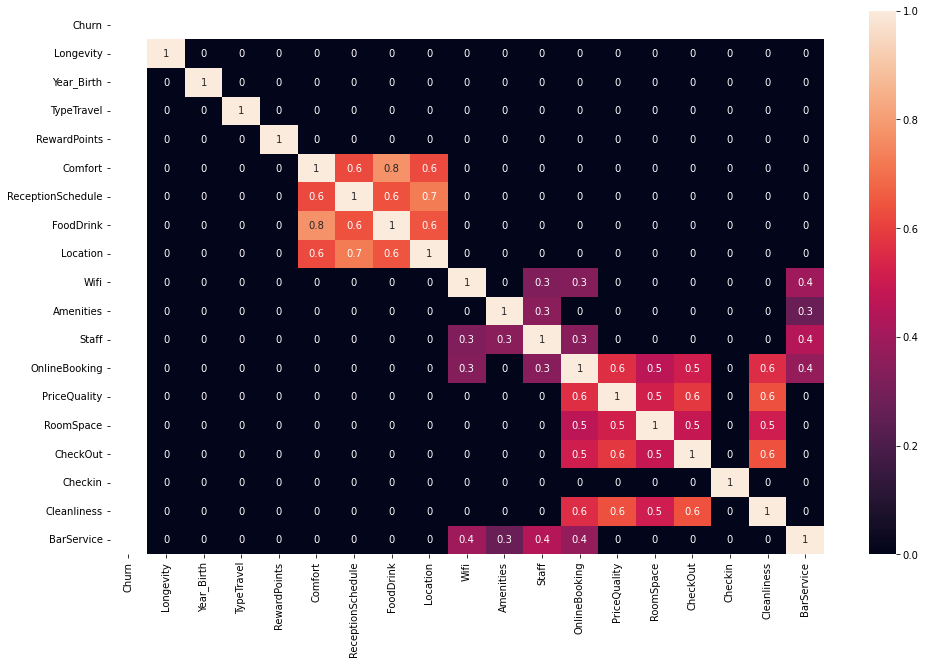

In [105]:
#db['Year_Birth'].corr(db['RoomType'])
nochurn = db[db['Churn']==False].corr(method = 'spearman').applymap(lambda x: 0 if x<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(nochurn, annot=True, fmt = '.1g')

#### A1: NoChurn dif correlation with total

In [ ]:
difChurn = db.corr(method = 'spearman') - db[db['Churn']==False].corr(method = 'spearman')
difChurn2=difChurn.applymap(lambda x: 0 if x<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(difChurn2, annot=True, fmt = '.1g')

#### A2: Churn dif correlation with total

In [ ]:
difChurn = db.corr(method = 'spearman') - db[db['Churn']==True].corr(method = 'spearman')
difChurn2=difChurn.applymap(lambda x: 0 if x<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(difChurn2, annot=True, fmt = '.1g')

#### A1 - A2: where difference between Churn and main is > than 0.2
- Negative: correlations greater for churn
- Positive : correlation greater for nochurn

##### Is this right? Our shouldn't I be doing it without subtracting the total frame? Think I'm doing a double down.
Done after this hearmap

<AxesSubplot:>

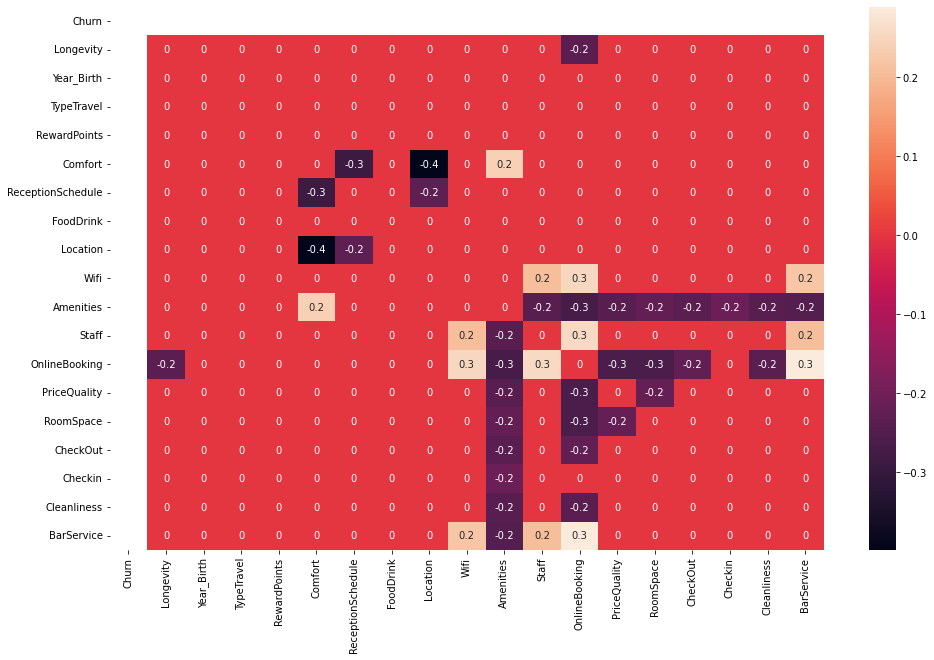

In [58]:
teste = (db.corr(method = 'spearman') - db[db['Churn']==False].corr(method = 'spearman')).applymap(lambda x: 0 if x<=0.2 else x) - (db.corr(method = 'spearman') - db[db['Churn']==True].corr(method = 'spearman')).applymap(lambda x: 0 if x<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(teste, annot=True, fmt = '.1g')

<AxesSubplot:>

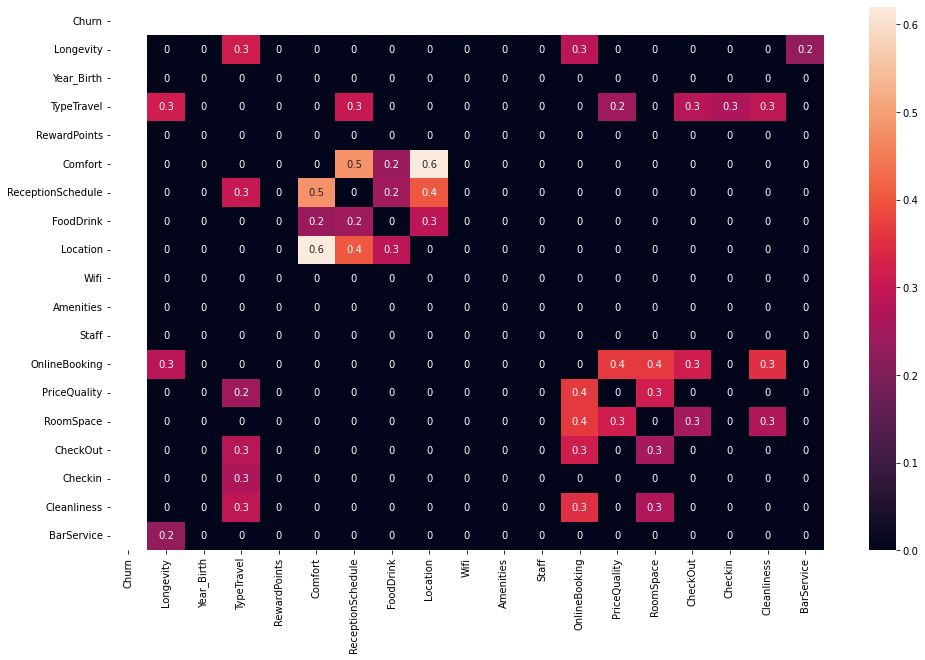

In [89]:
teste = ((db[db['Churn']==False].corr(method = 'spearman')) - (db[db['Churn']==True].corr(method = 'spearman'))).applymap(lambda x: 0 if x<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(teste, annot=True, fmt = '.1g')

### NoChurn per Type Travel
- Positive: Greater correlation for Business

<AxesSubplot:>

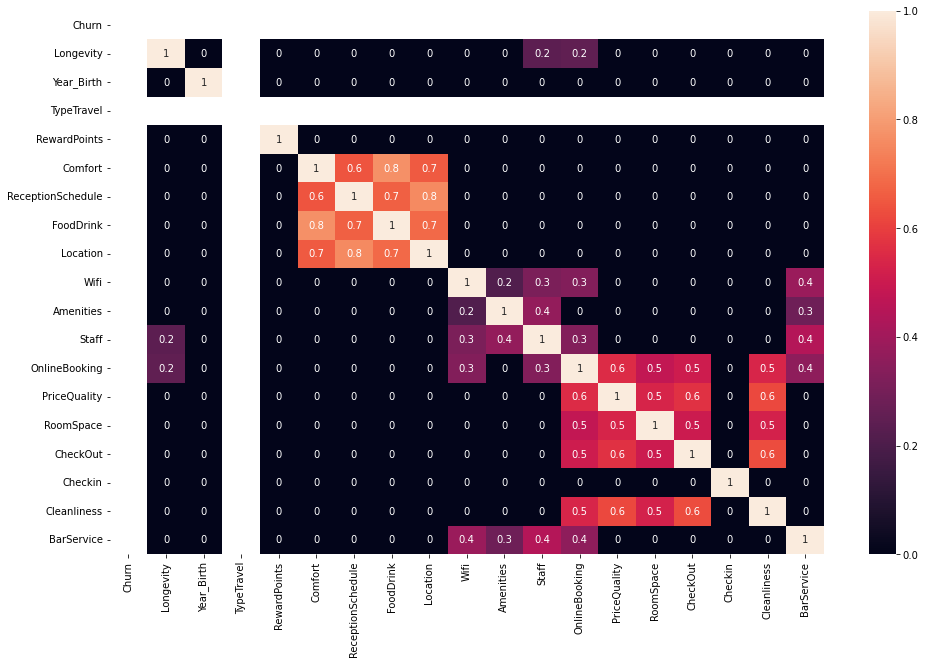

In [106]:
nochurnTypeTravel = ((db[(db['Churn']==False) & (db['TypeTravel']==True)]).corr(method = 'spearman')).applymap(lambda x: 0 if x<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(nochurnTypeTravel, annot=True, fmt = '.1g')

#### Churn per Type Travel
- Positive: Greater correlation for Business

<AxesSubplot:>

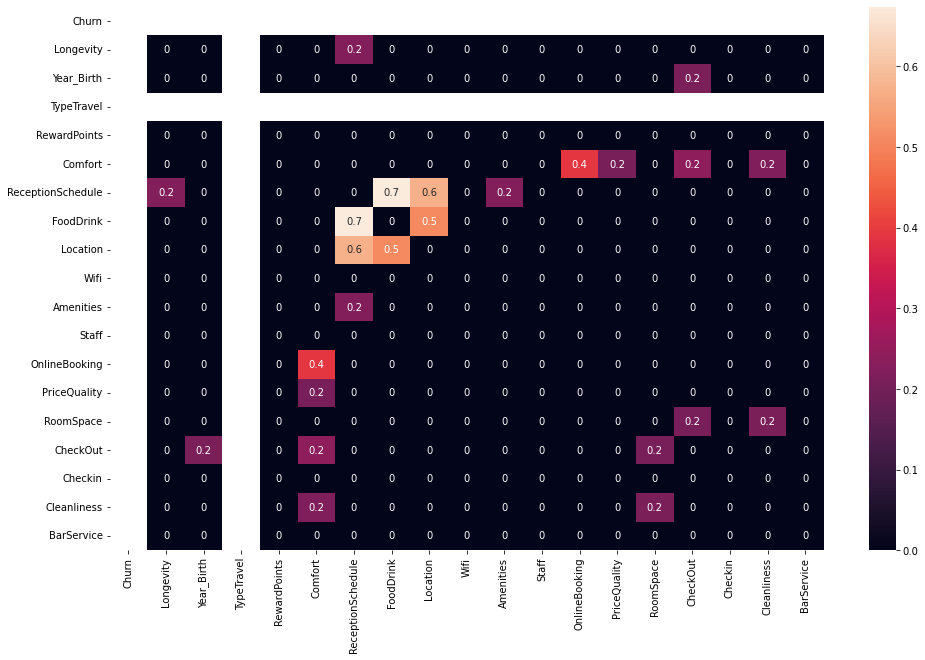

In [98]:
churnTypeTravel = ((db[(db['Churn']==True) & (db['TypeTravel']==True)]).corr(method = 'spearman')-(db[(db['Churn']==True) & (db['TypeTravel']==False)]).corr(method = 'spearman')).applymap(lambda x: 0 if x<=0.2 else x)
figure = plt.figure(figsize=(16,10))
sns.heatmap(churnTypeTravel, annot=True, fmt = '.1g')

#### Exploration

- Longevity with yes, no, y: change y to yes.
- Wifi has values of 6: the percentage of people who choose 6 among leisure/business (31% vs 69%) is in line with the general percentage of leisure/business (33% vs 67%). 0 and 6 are the two less choosen options. The order of prefered choice is the same for leisure and business.
- Changing the data type of Churn, Longevity and TypeTravel in order to correlate with the other variables shows only Churn-Amenities has a correlation greater than abs(0.5) --> value -0.6. Churn also has an abs(0.4) correlation with Staff and OnlineBooking. The other two never pass beyond abs(0.3).
- There are 3 rows that gave the same classification to every aspect (1548, 6707, 15259), two gave all 4 and the other all 5. All roomtype single, business and longevity = yes.




#### To Explore
- From the start, the only Attribute with missing non-null values is Year_Birth. For storytelling purposes, we should discuss how to explore the narrative here for median vs mode vs mean

- Include in storytelling the type of clients that use all 0 or all 5. Also, check the type of clients that use 1 instead of 0, does that make sense? Is check in and Check out necessary?

- Check how many repeat visits do we have from the potential customers. (Name)




































Heatmap Churn/noChurn com leisure/business com RoomType --> Diferencial entre total e parcial
KNN imputer - missing values TODO